# Ajuste de curvas

<img style="float: right; margin: 0px 0px 15px 15px;" src="https://upload.wikimedia.org/wikipedia/commons/a/a8/Regression_pic_assymetrique.gif" width="400px" height="125px" />

> El **ajuste de curvas** es el proceso de construir una curva (función), que sea el mejor ajuste a una serie de puntos. Las curvas ajustadas pueden ser usadas como asistencia en la visualización de datos, para inferir valores de una función donde no hay datos disponibles, y para resumir la relación entre variables.

**Referencia**:
- https://en.wikipedia.org/wiki/Curve_fitting
___

## 0. Introducción

Consideremos un polinomio de grado uno:

$$y = \beta_1 x + \beta_0.$$

Esta es una **línea recta** que tiene pendiente $\beta_1$. Sabemos que habrá una línea conectando dos puntos cualesquiera. Por tanto, *una ecuación polinómica de primer grado es un ajuste perfecto entre dos puntos*.

Si consideramos ahora un polinomio de segundo grado,

$$y = \beta_2 x^2 + \beta_1 x + \beta_0,$$

este se ajustará exactamente a tres puntos. Si aumentamos el grado de la función a la de un polinomio de tercer grado, obtenemos:

$$y = \beta_3 x^3 + \beta_2 x^2 + \beta_1 x + \beta_0,$$

que se ajustará a cuatro puntos.

**Ejemplos**
1. Encontrar la línea recta que pasa exactamente por los puntos $(3,1)$ y $(2,0)$.
2. Encontrar la parábola que pasa exactamente por los puntos $(0,1)$, $(1,0)$ y $(2,1)$.

**Solución**
1. Consideramos $y=\beta_1 x + \beta_0$. Evaluando en el punto $(3,1)$, obtenemos $\beta_1(3) + \beta_0 = 1$. Ahora, evaluando en el punto $(2,0)$, obtenemos $\beta_1(2) + \beta_0 = 0$. De esta manera,
$$\left[\begin{array}{cc} 1 & 3 \\ 1 & 2\end{array}\right]\left[\begin{array}{c} \beta_0 \\ \beta_1\end{array}\right]=\left[\begin{array}{c} 1 \\ 0\end{array}\right].$$
Resolviendo, $\beta_0=-2, \, \beta_1=1$.

2. Consideramos $y=\beta_2 x^2 + \beta_1 x + \beta_0$. Evaluando en el punto $(0,1)$, obtenemos $\beta_2(0)^2 + \beta_1(0) + \beta_0 = 1$. Ahora, evaluando en el punto $(1,0)$, obtenemos $\beta_2(1)^2 + \beta_1(1) + \beta_0 = 0$. Finalmente, evaluando en el punto $(2,1)$, obtenemos $\beta_2(2)^2 + \beta_1(2) + \beta_0 = 1$. De esta manera,
$$\left[\begin{array}{ccc} 1 & 0 & 0 \\ 1 & 1 & 1 \\ 1 & 2 & 4 \end{array}\right]\left[\begin{array}{c} \beta_0 \\ \beta_1 \\ \beta_2 \end{array}\right]=\left[\begin{array}{c} 1 \\ 0 \\ 1 \end{array}\right].$$
Resolviendo, $\beta_0=1, \, \beta_1=-2$ y $\beta_2=1$.

### ¿Qué tienen en común los anteriores problemas?
Las curvas están completamente determinadas por los puntos (datos limpios, suficientes y necesarios).

Esto se traduce en que, al llevar el problema a un sistema de ecuaciones lineales, existe una única solución: **no hay necesidad, ni se puede optimizar nada**.

¿Tendremos datos así de **'*bonitos*'** en la vida real?

La realidad es que los datos que encontraremos en nuestra vida profesional se parecen más a esto...

### ¿Cómo ajustamos una curva a esto?

## 1. Problema básico

<img style="float: right; margin: 0px 0px 15px 15px;" src="https://upload.wikimedia.org/wikipedia/commons/3/3a/Linear_regression.svg" width="400px" height="125px" />

Consideramos que tenemos un conjunto de n pares ordenados de datos $(x_i,y_i)$, para $i=1,2,3,\dots,n$.

### ¿Cuál es la recta que mejor se ajusta a estos datos?
Consideramos entonces ajustes de la forma $\hat{f}(x) = \beta_0+\beta_1 x = \left[1 \quad x\right]\left[\begin{array}{c} \beta_0 \\ \beta_1 \end{array}\right]=\left[1 \quad x\right]\boldsymbol{\beta}$ (lineas rectas).

Para decir '*mejor*', tenemos que definir algún sentido en que una recta se ajuste *mejor* que otra.

**Mínimos cuadrados**: el objetivo es seleccionar los coeficientes $\boldsymbol{\beta}=\left[\beta_0 \quad \beta_1 \right]^\top$, de forma que la función evaluada en los puntos $x_i$ i.e.($\hat{f}(x_i)$) aproxime los valores correspondientes $y_i$.

La formulación por mínimos cuadrados, encuentra los $\boldsymbol{\beta}=\left[\beta_0 \quad \beta_1 \right]^T$ que minimiza
$$\sum_{i=1}^{n}(y_i-\hat{f}(x_i))^2=\sum_{i=1}^{n}(y_i-\left[1 \quad x_i\right]\boldsymbol{\beta})^2=\left|\left|\boldsymbol{y}-\boldsymbol{X}\boldsymbol{\beta}\right|\right|^2,$$

donde $\boldsymbol{y}=\left[y_1,\quad\cdots\quad, y_n\right]^\top$, y $\boldsymbol{X}=\left[\begin{array}{ccc}1 & x_1\\ \vdots & \vdots \\ 1 & x_n\end{array}\right].$ Esto es,

$$\boldsymbol{\beta}^{ls} = \arg \min_{\boldsymbol{\beta}} \left|\left|\boldsymbol{y}-\boldsymbol{X}\boldsymbol{\beta}\right|\right|^2$$

In [1]:
import numpy as np
import matplotlib.pyplot as plt

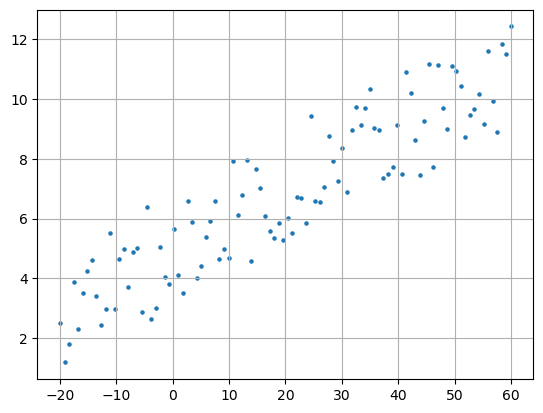

In [2]:
x=np.linspace(-20,60,100)
y=5+1/10*x+np.random.uniform(-2,2,100)
plt.scatter(x,y,s=5) # s  ->  size
plt.grid()

In [3]:
from scipy.optimize import minimize

In [4]:
minimize?

In [5]:
# Definimos nuestro criterio de optimización (mínimos cuadrados)
def fun(beta,x,y):
    f=beta[0]+beta[1]*x
    return np.sum((y-f)**2)

In [6]:
beta0=np.array([1,1])
sol=minimize(fun,beta0,args=(x,y))
sol

      fun: 125.65808282556006
 hess_inv: array([[ 8.67574329e-03, -1.83787142e-04],
       [-1.83787142e-04,  9.18935668e-06]])
      jac: array([-1.90734863e-06,  5.72204590e-06])
  message: 'Optimization terminated successfully.'
     nfev: 21
      nit: 5
     njev: 7
   status: 0
  success: True
        x: array([4.73496152, 0.10369645])

In [7]:
sol.x # beta óptima

array([4.73496152, 0.10369645])

In [8]:
sol.fun # la suma de los errores al cuadrado evaluados en la solución óptima

125.65808282556006

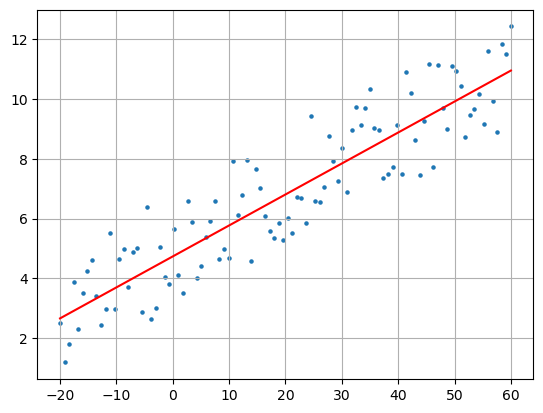

In [9]:
plt.scatter(x,y,s=5)
f=sol.x[0]+sol.x[1]*x
plt.plot(x,f,'r')
plt.grid()

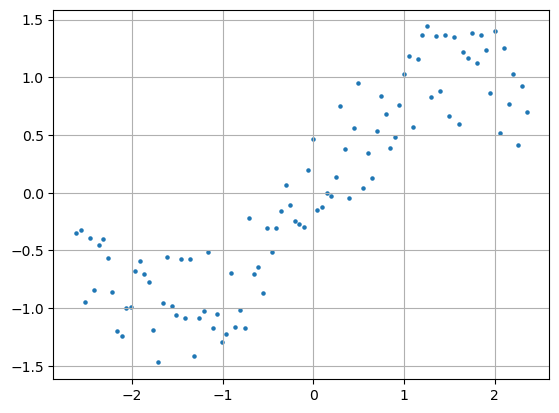

In [10]:
x=np.linspace(-5/6*np.pi,3/4*np.pi,100)
y=np.sin(x)+np.random.uniform(-0.5,0.5,100)
plt.scatter(x,y,s=5)
plt.grid()

In [11]:
beta0=np.random.rand(2) # Se necesitan dos valores para ajustar un polinomio lineal
sol1=minimize(fun,beta0,args=(x,y))
sol1

      fun: 18.25321510324345
 hess_inv: array([[ 1.04118689, -0.29387893],
       [-0.29387893,  0.08590552]])
      jac: array([1.66893005e-06, 5.00679016e-06])
  message: 'Optimization terminated successfully.'
     nfev: 15
      nit: 2
     njev: 5
   status: 0
  success: True
        x: array([0.04984101, 0.51268498])

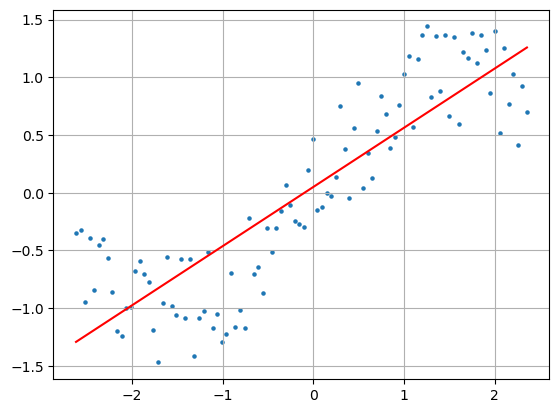

In [12]:
plt.scatter(x,y,s=5)
f=sol1.x[0]+sol1.x[1]*x
plt.plot(x,f,'r')
plt.grid()

## 2. Ajuste polinomial

Ahora, considere el siguiente conjunto de datos...

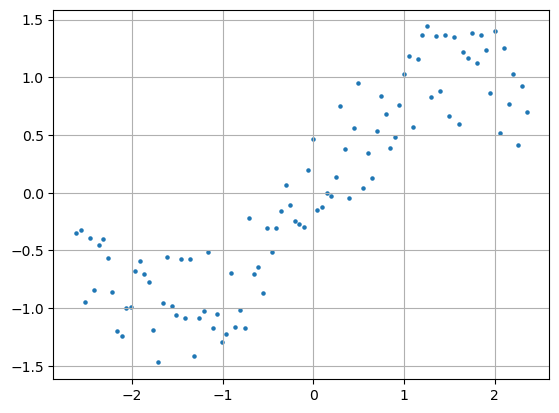

In [13]:
plt.scatter(x,y,s=5)
plt.grid()

In [14]:
# Ajuste de polinomio cuadrático
# 
# Definimos el criterio de optimización para el polinomio de grado dos
def fun(beta,x,y):
    f=beta[0]+beta[1]*x+beta[2]*x**2
    return np.sum((y-f)**2)

In [15]:
beta0=np.random.rand(3) # Ahora necesitamos tres valores para 'beta'
sol2=minimize(fun,beta0,args=(x,y))
sol2

      fun: 16.77875419084114
 hess_inv: array([[ 0.01113583, -0.00081589, -0.00301837],
       [-0.00081589,  0.0028779 ,  0.00077011],
       [-0.00301837,  0.00077011,  0.00159396]])
      jac: array([1.90734863e-06, 1.19209290e-06, 1.04904175e-05])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 36
      nit: 4
     njev: 9
   status: 2
  success: False
        x: array([-0.08483327,  0.52958378,  0.06454868])

El polinomio resultante es
$$
-0.0103+0.4871x+0.0049x^2
$$

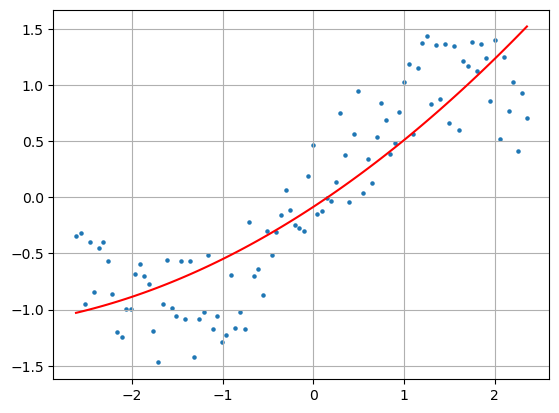

In [16]:
plt.scatter(x,y,s=5)
f=sol2.x[0]+sol2.x[1]*x+sol2.x[2]*x**2
plt.plot(x,f,'r')
plt.grid()

In [17]:
# Ajuste del polinomio cúbico
# 
# Criterio de opimización para el polinomio de grado tres
def fun(beta,x,y):
    f=beta[0]+beta[1]*x+beta[2]*x**2+beta[3]*x**3
    return np.sum((y-f)**2)
beta0=np.random.rand(4)
sol3=minimize(fun,beta0,args=(x,y))
sol3

      fun: 8.139068378136107
 hess_inv: array([[ 0.0114159 ,  0.00115869, -0.00312065, -0.00043282],
       [ 0.00115869,  0.01464167, -0.00091238, -0.00325741],
       [-0.00312065, -0.00091238,  0.00154854,  0.00034312],
       [-0.00043282, -0.00325741,  0.00034312,  0.00087207]])
      jac: array([0.00000000e+00, 2.38418579e-07, 0.00000000e+00, 5.96046448e-07])
  message: 'Optimization terminated successfully.'
     nfev: 50
      nit: 8
     njev: 10
   status: 0
  success: True
        x: array([-0.02429865,  0.98782895,  0.01636154, -0.12270751])

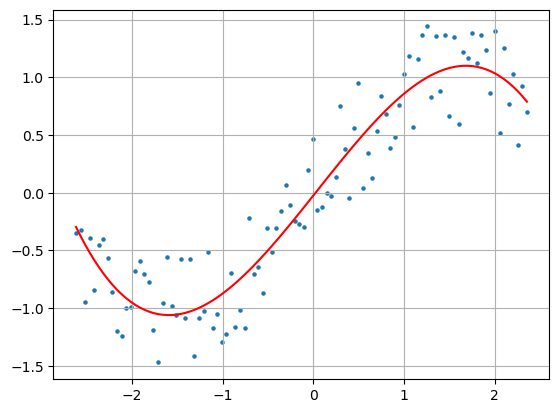

In [18]:
plt.scatter(x,y,s=5)
f=sol3.x[0]+sol3.x[1]*x+sol3.x[2]*x**2+sol3.x[3]*x**3
plt.plot(x,f,'r')
plt.grid()

In [19]:
def fun(beta,x,y):
    X=np.array([x**i for i in range(len(beta))]) # [x**0, x**1,..., x**n]; n=len(beta)
    f=np.dot(beta,X)                             # beta[0]*x**0+beta[1]*x**1+...+beta[n]*x**n
    return np.sum((y-f)**2)

In [20]:
# Ajuste de un polinomio de grado 4
beta0=np.random.rand(5)
sol4=minimize(fun,beta0,args=(x,y))
sol4

      fun: 7.995801705331974
 hess_inv: array([[ 0.01739892, -0.00139714, -0.01270049,  0.00051622,  0.00180674],
       [-0.00139714,  0.0157043 ,  0.00315288, -0.00365524, -0.00076552],
       [-0.01270049,  0.00315288,  0.01687783, -0.00117013, -0.00289029],
       [ 0.00051622, -0.00365524, -0.00117013,  0.00102068,  0.0002851 ],
       [ 0.00180674, -0.00076552, -0.00289029,  0.0002851 ,  0.00054491]])
      jac: array([1.19209290e-07, 0.00000000e+00, 1.19209290e-07, 1.19209290e-07,
       5.96046448e-08])
  message: 'Optimization terminated successfully.'
     nfev: 84
      nit: 10
     njev: 14
   status: 0
  success: True
        x: array([-0.06574869,  1.00539956,  0.08262021, -0.12924783, -0.01249109])

In [22]:
fun(sol4.x,x,y)

7.995801705331974

In [24]:
sol4.fun

7.995801705331974

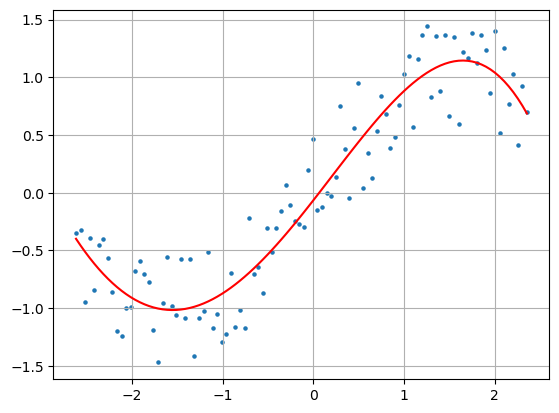

In [23]:
plt.scatter(x,y,s=5)
X=np.array([x**i for i in range(len(sol4.x))])
f=np.dot(sol4.x,X)
plt.plot(x,f,'r')
plt.grid()

In [35]:
# Polinomio de grado 'n'
def ajuste(x,y,n):
    # Criterio de optimización (mínimos cuadrados)
    def fun(beta,x,y):
        X=np.array([x**i for i in range(len(beta))])
        f=np.dot(beta,X)
        return np.sum((y-f)**2)
    # Solución óptima
    beta0=np.random.rand(n+1)
    soln=minimize(fun,beta0,args=(x,y))
    # Gráfica
    plt.scatter(x,y,s=5,c='k')
    X=np.array([x**i for i in range(n+1)])
    f=np.dot(soln.x,X)
    plt.plot(x,f,label='Grado '+str(n))
    plt.legend()
    plt.grid()
    return soln.x,soln.fun

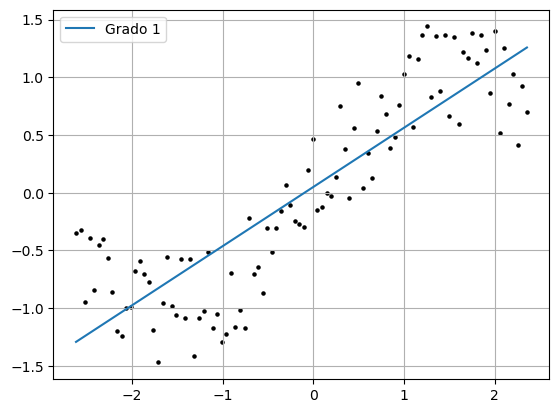

In [36]:
s1=ajuste(x,y,1) # polinomio de grado 1

In [37]:
s1 # Coeficientes óptimos, error de ajuste

(array([0.049841  , 0.51268497]), 18.253215103243452)

In [38]:
N=5
for i in range(1,N+1):
    print(i)

1
2
3
4
5


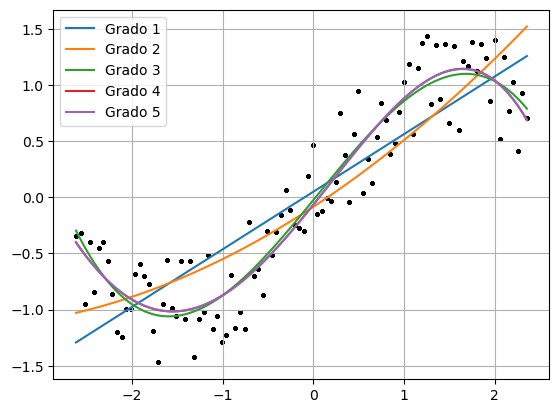

In [40]:
soluciones=[]
for i in range(1,N+1):
    soluciones.append(ajuste(x,y,i)) # Agregamos al final de la lista el elemento que regrese 'ajuste'

In [41]:
soluciones

[(array([0.049841  , 0.51268497]), 18.25321510324346),
 (array([-0.08483331,  0.52958377,  0.06454869]), 16.77875419084123),
 (array([-0.02429866,  0.98782894,  0.01636155, -0.1227075 ]),
  8.139068378135768),
 (array([-0.06574867,  1.0053994 ,  0.08262017, -0.1292478 , -0.01249108]),
  7.99580170532785),
 (array([-6.51529249e-02,  1.00983452e+00,  8.12915202e-02, -1.32575714e-01,
         -1.21724805e-02,  4.86801130e-04]),
  7.995455112534251)]

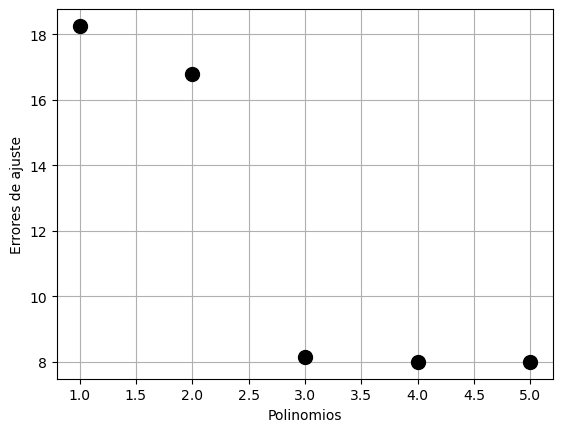

In [47]:
for i in range(N):
    plt.plot(i+1,soluciones[i][1],'ok',ms=10)
plt.xlabel('Polinomios')
plt.ylabel('Errores de ajuste')
plt.grid()

## 3. Regularización

Vimos que la solución de mínimos cuadrados es:
$$\boldsymbol{\beta}^{ls} = \arg \min_{\boldsymbol{\beta}} \left|\left|\boldsymbol{y}-\boldsymbol{X}\boldsymbol{\beta}\right|\right|^2.$$

Sin embargo, si crecemos el orden del modelo hay overfitting y algunos coeficientes óptimos $\boldsymbol{\beta}$ crecen muchísimo. Que un coeficiente sea muy grande, significa que se le da mucha importancia a alguna característica (que quizá sea ruido... no sirve para predecir).

La regularización consiste en penalizar la magnitud de los coeficientes $\boldsymbol{\beta}$ en el problema de optimización, para que no crezcan tanto. 

### 3.1. Ridge

$$\boldsymbol{\beta}^{ridge} = \arg \min_{\boldsymbol{\beta}} \left|\left|\boldsymbol{y}-\boldsymbol{X}\boldsymbol{\beta}\right|\right|^2 + \lambda\left|\left|\boldsymbol{\beta}\right|\right|^2$$

In [48]:
# Polinomio de grado 'n'
def ajuste(x,y,n,L):
    # Criterio de optimización (mínimos cuadrados)
    def fun(beta,x,y,L):
        X=np.array([x**i for i in range(len(beta))])
        f=np.dot(beta,X)
        return np.sum((y-f)**2)+L*np.sum(beta**2)
    # Solución óptima
    beta0=np.random.rand(n+1)
    soln=minimize(fun,beta0,args=(x,y,L))
    # Gráfica
    plt.scatter(x,y,s=5,c='k')
    X=np.array([x**i for i in range(n+1)])
    f=np.dot(soln.x,X)
    plt.plot(x,f,label='Grado '+str(n))
    plt.legend()
    plt.grid()
    return soln.x,soln.fun

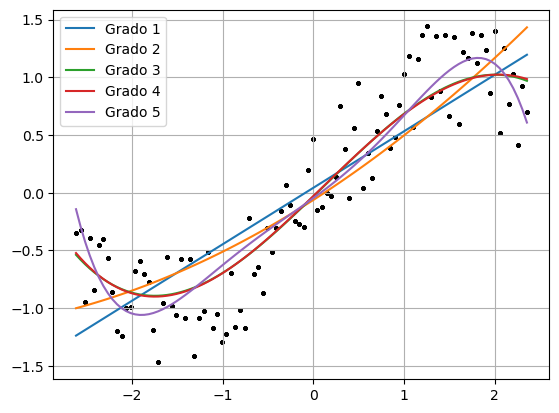

In [52]:
soluciones=[]
for i in range(1,N+1):
    soluciones.append(ajuste(x,y,i,10))

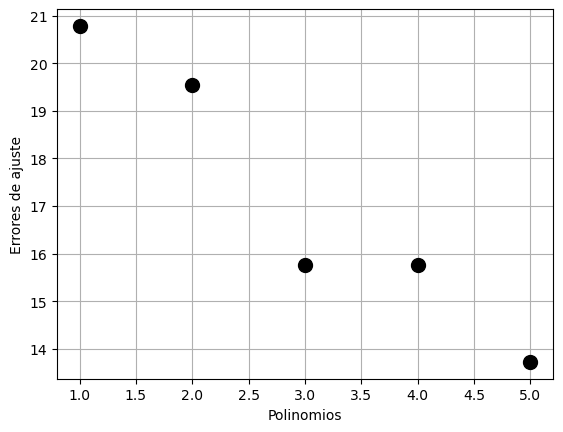

In [53]:
for i in range(N):
    plt.plot(i+1,soluciones[i][1],'ok',ms=10)
plt.xlabel('Polinomios')
plt.ylabel('Errores de ajuste')
plt.grid()

### 3.2. Lasso

$$\boldsymbol{\beta}^{lasso} = \arg \min_{\boldsymbol{\beta}} \left|\left|\boldsymbol{y}-\boldsymbol{X}\boldsymbol{\beta}\right|\right|^2 + \lambda\left|\left|\boldsymbol{\beta}\right|\right|_1$$

La norma 1 no es más que la suma de los valores absolutos de las componentes $\left|\left|\boldsymbol{\beta}\right|\right|_1=\sum_{j=0}^m\left|\beta_j\right|$.